<a href="https://colab.research.google.com/github/BooEiEi/project/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd #นำเข้า pandas แทนที่ด้วย pd
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #นำเข้าข้อมูลจาก drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project'# ชี้ dirve ที่เราต้องการ
import missingno as mno
from sklearn import linear_model
%matplotlib inline
import matplotlib
import sklearn 
from sklearn.impute import KNNImputer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv(os.path.join(path, 'youth.csv'))
data

No.            LabNo  Sex  AgeSYear  Enose  Overall  Body shape age  \
0     1.0              NaN    2      41.0    NaN      NaN             NaN   
1     2.0  201807163166.00    1      49.0    NaN      1.0             1.0   
2     3.0     201807163167    1      44.0    NaN      NaN             NaN   
3     4.0     201807163168    2      37.0    NaN      NaN             NaN   
4     5.0     201807163169    2      38.0    NaN      NaN             NaN   
...   ...              ...  ...       ...    ...      ...             ...   
2269  NaN              V17    2      31.0    NaN      NaN             NaN   
2270  NaN              V19    2      32.0    NaN      NaN             NaN   
2271  NaN              V20    1      28.0    NaN      1.0             NaN   
2272  NaN              V21    1      29.0    NaN      NaN             NaN   
2273  NaN              V22    2      31.0    NaN      NaN             NaN   

      Kidney  Heart  Liver  ...  071_HbA1c    CK   LD-P   AMY7   TP1  DBIL  \
0        NaN    NaN    NaN  ...        4.8  79.0  231.0   59.0  7.16  0.10   
1        NaN    NaN    NaN  ...        NaN   NaN    NaN    NaN   NaN   NaN   
2        NaN    NaN    NaN  ...        4.6  85.0  175.0  104.0  7.43  0.15   
3        NaN    NaN    NaN  ...        NaN   NaN    NaN    NaN   NaN   NaN   
4        NaN    NaN    NaN  ...        5.4  57.0  177.0   89.0  7.11  0.02   
...      ...    ...    ...  ...        ...   ...    ...    ...   ...   ...   
2269     NaN    NaN    NaN  ...        NaN   NaN    NaN    NaN   NaN   NaN   
2270     NaN    NaN    NaN  ...        NaN   NaN    NaN    NaN   NaN   NaN   
2271     NaN    1.0    NaN  ...        NaN   NaN    NaN    NaN   NaN   NaN   
2272     NaN    NaN    NaN  ...        NaN   NaN    NaN    NaN   NaN   NaN   
2273     NaN    NaN    NaN  ...        NaN   NaN    NaN    NaN   NaN   NaN   

      TBIL  ALB1   GGT  homocysteine  
0     0.30  4.48  11.0         10.88  
1      NaN   NaN   NaN         21.11  
2     1.26  4.70  15.0         11.94  
3      NaN   NaN   NaN          9.01  
4     0.20  3.92  24.0          8.85  
...    ...   ...   ...           ...  
2269   NaN   NaN   NaN           NaN  
2270   NaN   NaN   NaN           NaN  
2271   NaN   NaN   NaN           NaN  
2272   NaN   NaN   NaN           NaN  
2273   NaN   NaN   NaN           NaN  

[2274 rows x 47 columns]

In [3]:
data = data.dropna(subset=['telomere length (kb) '])

In [4]:
data=data.drop(['No.', 'LabNo','DHEAs (BRIA)'], axis=1)

In [5]:
data=data.drop(data.columns[2: 10], axis=1)

#percent missing value

In [6]:
missing = data.isna().sum()
missing

Sex                          0
AgeSYear                     0
telomere length (kb)         0
Weight                       8
Height                       8
BMI                          8
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
CK                         249
LD-P                       249
AMY7                       249
TP1                        249
DBIL                       249
TBIL    

In [7]:
data.isna().mean().round(4)*100

Sex                         0.00
AgeSYear                    0.00
telomere length (kb)        0.00
Weight                      1.89
Height                      1.89
BMI                         1.89
Systolic                    1.89
Diastolic                   2.13
HeartRate                  12.06
SMM                        53.19
Fat Mass                   53.19
% Body fat                 53.19
waist to hip radio         53.19
abdominal circumference    53.43
visceral fat area          53.19
001_Glucose                 0.24
002_BUN                     0.00
003_Creatinine              0.00
004_Uric Acid              21.99
005_Cholesterol             0.00
006_Triglyceride            0.00
008_HDL-C                   0.00
009_LDL                     0.00
010_AST                     0.00
012_ALT                     0.24
013_Alkaline Phos           6.86
071_HbA1c                  39.48
CK                         58.87
LD-P                       58.87
AMY7                       58.87
TP1       

#Cleaning

In [8]:
data=data.drop(data.columns[27:37], axis=1)

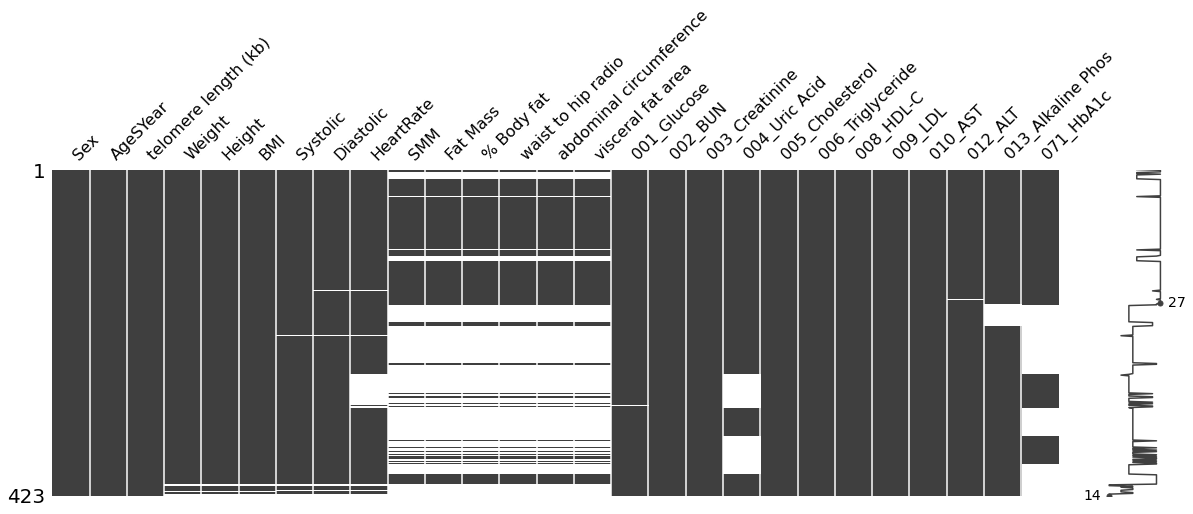

In [9]:
mno.matrix(data, figsize = (20, 6))

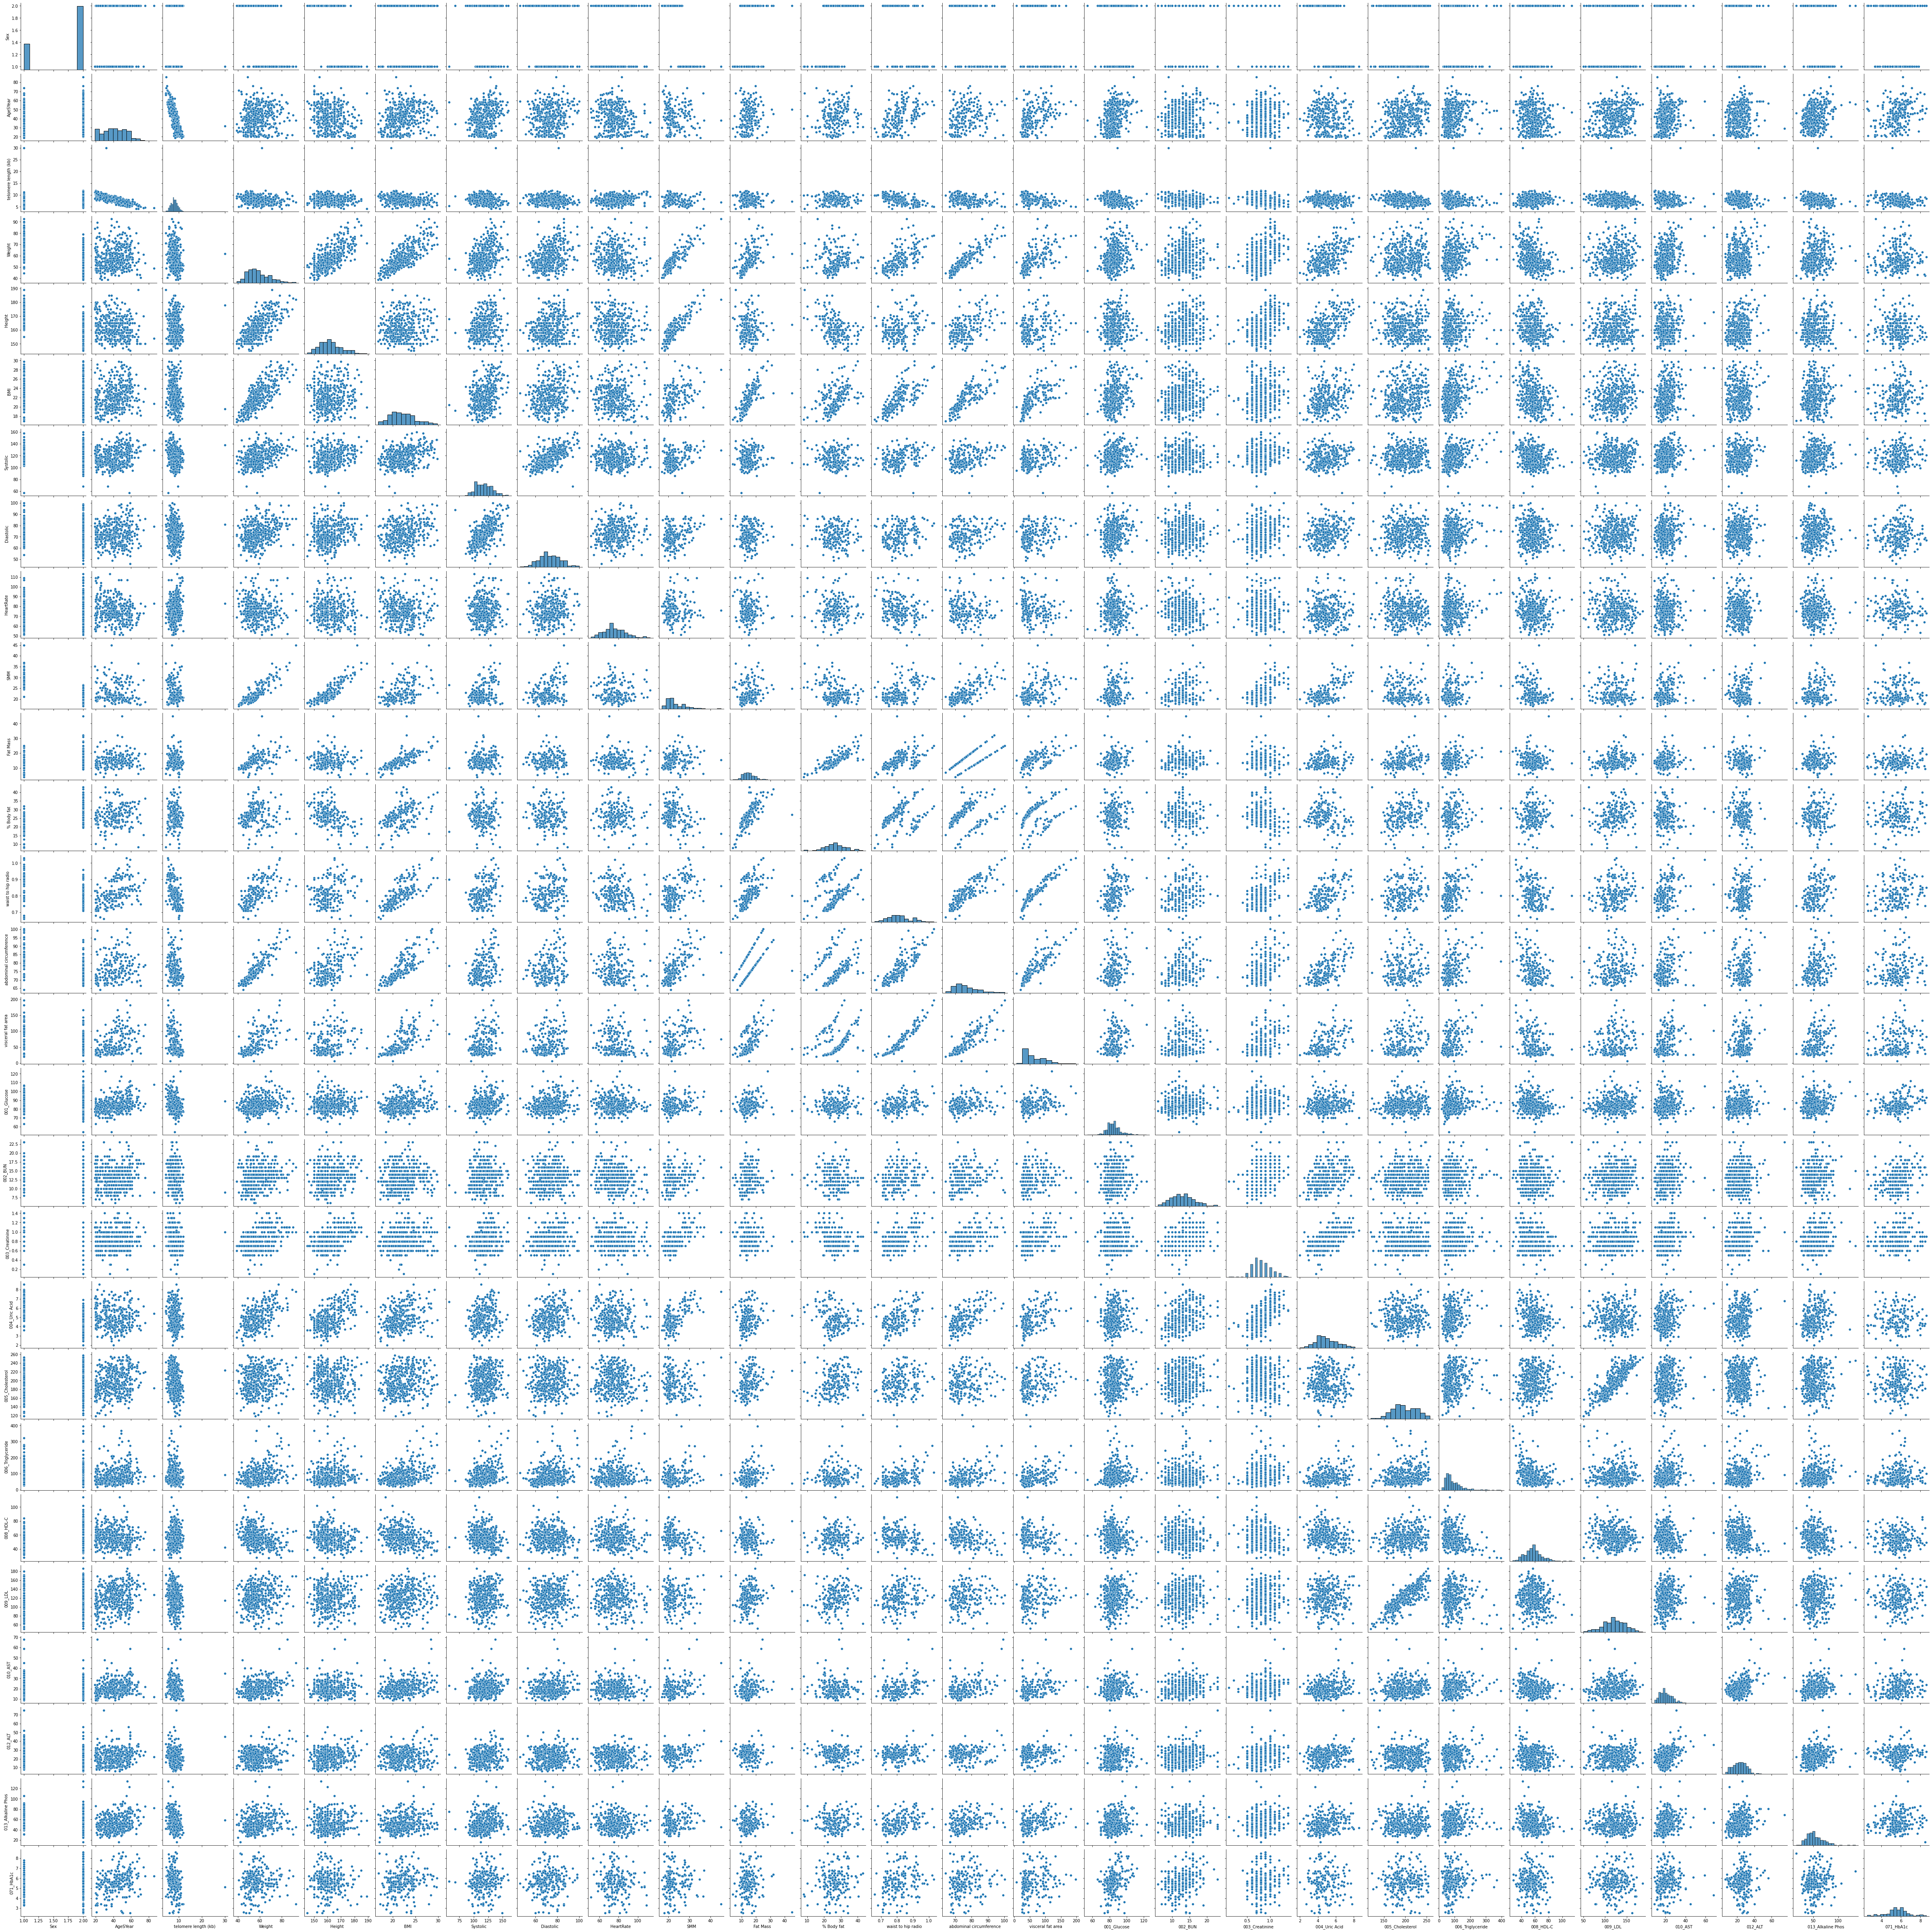

In [67]:
matplotlib.rcParams['font.size'] = 10

sns.pairplot(data)

In [10]:
data

Sex  AgeSYear  telomere length (kb)   Weight  Height   BMI  Systolic  \
49      2      58.0                   7.30    47.2   156.0  19.4     112.0   
56      2      57.0                   6.36    47.4   153.0  20.2     114.0   
85      2      24.0                   9.71    53.2   157.0  21.6     103.0   
103     2      62.0                   6.17    54.4   165.0  20.0      95.0   
107     2      86.0                   4.55    49.0   154.0  20.7     129.0   
...   ...       ...                    ...     ...     ...   ...       ...   
2267    2      25.0                   8.98    47.0   165.0  17.3     104.0   
2269    2      31.0                   8.23    72.2   168.0  25.6     123.0   
2270    2      32.0                   8.79     NaN     NaN   NaN       NaN   
2272    1      29.0                   8.93     NaN     NaN   NaN       NaN   
2273    2      31.0                   7.92     NaN     NaN   NaN       NaN   

      Diastolic  HeartRate   SMM  ...  003_Creatinine  004_Uric Acid  \
49         64.0       70.0   NaN  ...             0.6            4.8   
56         75.0       69.0  19.3  ...             1.0            5.0   
85         69.0       78.0  21.3  ...             0.8            5.2   
103        75.0       83.0  21.6  ...             0.7            4.1   
107        79.0       83.0   NaN  ...             0.7            5.4   
...         ...        ...   ...  ...             ...            ...   
2267       63.0       89.0   NaN  ...             0.6            4.8   
2269       89.0       69.0   NaN  ...             0.6            6.1   
2270        NaN        NaN   NaN  ...             0.7            5.1   
2272        NaN        NaN   NaN  ...             1.0            6.8   
2273        NaN        NaN   NaN  ...             0.7            4.0   

      005_Cholesterol  006_Triglyceride  008_HDL-C  009_LDL  010_AST  012_ALT  \
49              180.0              97.0       62.0     98.0     25.0     32.0   
56              176.0              51.0       72.0     94.0     16.0     16.0   
85              159.0              45.0       52.0     98.0     13.0     17.0   
103             230.0              94.0       61.0    151.0     18.0     31.0   
107             183.0              86.0       39.0    127.0     12.0     22.0   
...               ...               ...        ...      ...      ...      ...   
2267            232.0              36.0       96.0    128.0     18.0     12.0   
2269            187.0              49.0       51.0    127.0     21.0     24.0   
2270            222.0              58.0       79.0    132.0     17.0     10.0   
2272            140.0              92.0       48.0     73.0     31.0     75.0   
2273            243.0             161.0       87.0    124.0     24.0     11.0   

      013_Alkaline Phos  071_HbA1c  
49                 40.0        5.8  
56                 62.0        5.1  
85                 50.0        5.4  
103                76.0        5.6  
107                82.0        6.2  
...                 ...        ...  
2267               46.0        NaN  
2269               71.0        NaN  
2270               34.0        NaN  
2272               69.0        NaN  
2273               46.0        NaN  

[423 rows x 27 columns]

In [25]:
data1 = data.dropna()
data1

Sex  AgeSYear  telomere length (kb)   Weight  Height   BMI  Systolic  \
56     2      57.0                   6.36    47.4   153.0  20.2     114.0   
85     2      24.0                   9.71    53.2   157.0  21.6     103.0   
103    2      62.0                   6.17    54.4   165.0  20.0      95.0   
111    2      35.0                   7.23    56.3   161.0  21.7      95.0   
156    1      46.0                   6.52    72.3   170.0  25.0     133.0   
..   ...       ...                    ...     ...     ...   ...       ...   
728    1      60.0                   5.81    72.0   170.0  24.9     131.0   
729    1      58.0                   5.05    62.0   168.0  22.0     103.0   
731    2      42.0                   9.48    55.5   165.0  20.4     102.0   
734    2      61.0                   6.06    61.8   159.0  24.4     117.0   
739    2      31.0                   9.44    58.2   169.0  20.4     108.0   

     Diastolic  HeartRate   SMM  ...  003_Creatinine  004_Uric Acid  \
56        75.0       69.0  19.3  ...             1.0            5.0   
85        69.0       78.0  21.3  ...             0.8            5.2   
103       75.0       83.0  21.6  ...             0.7            4.1   
111       57.0       72.0  22.5  ...             0.6            5.0   
156       77.0      107.0  29.2  ...             0.9            6.9   
..         ...        ...   ...  ...             ...            ...   
728       74.0       69.0  30.5  ...             0.9            6.9   
729       76.0       72.0  27.8  ...             1.0            6.8   
731       52.0       77.0  22.9  ...             0.8            4.7   
734       60.0       72.0  23.4  ...             0.8            5.1   
739       69.0       73.0  25.0  ...             0.7            4.3   

     005_Cholesterol  006_Triglyceride  008_HDL-C  009_LDL  010_AST  012_ALT  \
56             176.0              51.0       72.0     94.0     16.0     16.0   
85             159.0              45.0       52.0     98.0     13.0     17.0   
103            230.0              94.0       61.0    151.0     18.0     31.0   
111            198.0              47.0       68.0    120.0     16.0     20.0   
156            194.0              63.0       60.0    122.0     15.0     19.0   
..               ...               ...        ...      ...      ...      ...   
728            182.0             179.0       39.0    107.0     36.0     31.0   
729            191.0              62.0       47.0    132.0     16.0     33.0   
731            212.0              68.0       63.0    135.0     11.0     16.0   
734            235.0              66.0       56.0    166.0     15.0     23.0   
739            200.0              44.0       56.0    135.0     14.0     21.0   

     013_Alkaline Phos  071_HbA1c  
56                62.0        5.1  
85                50.0        5.4  
103               76.0        5.6  
111               35.0        5.1  
156               69.0        5.2  
..                 ...        ...  
728               79.0        6.5  
729               42.0        6.8  
731               33.0        4.8  
734               44.0        5.4  
739               31.0        4.7  

[154 rows x 27 columns]

In [29]:
X = data1.drop(data1.columns[2], axis=1)
y= data1.loc[:,['telomere length (kb) ']]

In [30]:
X

Sex  AgeSYear  Weight  Height   BMI  Systolic  Diastolic  HeartRate  \
56     2      57.0    47.4   153.0  20.2     114.0       75.0       69.0   
85     2      24.0    53.2   157.0  21.6     103.0       69.0       78.0   
103    2      62.0    54.4   165.0  20.0      95.0       75.0       83.0   
111    2      35.0    56.3   161.0  21.7      95.0       57.0       72.0   
156    1      46.0    72.3   170.0  25.0     133.0       77.0      107.0   
..   ...       ...     ...     ...   ...       ...        ...        ...   
728    1      60.0    72.0   170.0  24.9     131.0       74.0       69.0   
729    1      58.0    62.0   168.0  22.0     103.0       76.0       72.0   
731    2      42.0    55.5   165.0  20.4     102.0       52.0       77.0   
734    2      61.0    61.8   159.0  24.4     117.0       60.0       72.0   
739    2      31.0    58.2   169.0  20.4     108.0       69.0       73.0   

      SMM  Fat Mass  ...  003_Creatinine  004_Uric Acid  005_Cholesterol  \
56   19.3      12.5  ...             1.0            5.0            176.0   
85   21.3      14.6  ...             0.8            5.2            159.0   
103  21.6      15.2  ...             0.7            4.1            230.0   
111  22.5      15.4  ...             0.6            5.0            198.0   
156  29.2      19.0  ...             0.9            6.9            194.0   
..    ...       ...  ...             ...            ...              ...   
728  30.5      13.8  ...             0.9            6.9            182.0   
729  27.8      11.9  ...             1.0            6.8            191.0   
731  22.9      14.1  ...             0.8            4.7            212.0   
734  23.4      19.2  ...             0.8            5.1            235.0   
739  25.0      13.0  ...             0.7            4.3            200.0   

     006_Triglyceride  008_HDL-C  009_LDL  010_AST  012_ALT  \
56               51.0       72.0     94.0     16.0     16.0   
85               45.0       52.0     98.0     13.0     17.0   
103              94.0       61.0    151.0     18.0     31.0   
111              47.0       68.0    120.0     16.0     20.0   
156              63.0       60.0    122.0     15.0     19.0   
..                ...        ...      ...      ...      ...   
728             179.0       39.0    107.0     36.0     31.0   
729              62.0       47.0    132.0     16.0     33.0   
731              68.0       63.0    135.0     11.0     16.0   
734              66.0       56.0    166.0     15.0     23.0   
739              44.0       56.0    135.0     14.0     21.0   

     013_Alkaline Phos  071_HbA1c  
56                62.0        5.1  
85                50.0        5.4  
103               76.0        5.6  
111               35.0        5.1  
156               69.0        5.2  
..                 ...        ...  
728               79.0        6.5  
729               42.0        6.8  
731               33.0        4.8  
734               44.0        5.4  
739               31.0        4.7  

[154 rows x 26 columns]

In [31]:
y

telomere length (kb) 
56                    6.36
85                    9.71
103                   6.17
111                   7.23
156                   6.52
..                     ...
728                   5.81
729                   5.05
731                   9.48
734                   6.06
739                   9.44

[154 rows x 1 columns]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=22)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


In [34]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.575974864708682
RMSE value for k=  2 is: 1.5682080897965125
RMSE value for k=  3 is: 1.5726489535757164
RMSE value for k=  4 is: 1.431226281674159
RMSE value for k=  5 is: 1.2968205785316742
RMSE value for k=  6 is: 1.2838942706499965
RMSE value for k=  7 is: 1.2714250245898855
RMSE value for k=  8 is: 1.2341425209823922
RMSE value for k=  9 is: 1.2273896627840077
RMSE value for k=  10 is: 1.1931631719252438
RMSE value for k=  11 is: 1.223148767958223
RMSE value for k=  12 is: 1.2377446628276862
RMSE value for k=  13 is: 1.2291355317348704
RMSE value for k=  14 is: 1.2509000972597917
RMSE value for k=  15 is: 1.245151854106537
RMSE value for k=  16 is: 1.2458625477568646
RMSE value for k=  17 is: 1.2736674202472416
RMSE value for k=  18 is: 1.2676904032855334
RMSE value for k=  19 is: 1.2893174535480354
RMSE value for k=  20 is: 1.2902259648304168


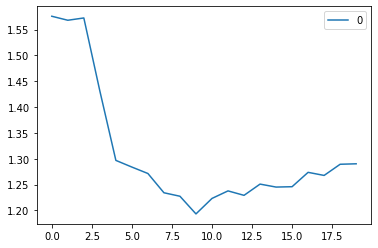

In [39]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

plt.savefig('curveKNN.png')

In [41]:
imputer = KNNImputer(n_neighbors = 10)

In [42]:
df_filled = imputer.fit_transform(data)
df_filled

array([[ 2.  , 58.  ,  7.3 , ..., 32.  , 40.  ,  5.8 ],
       [ 2.  , 57.  ,  6.36, ..., 16.  , 62.  ,  5.1 ],
       [ 2.  , 24.  ,  9.71, ..., 17.  , 50.  ,  5.4 ],
       ...,
       [ 2.  , 32.  ,  8.79, ..., 10.  , 34.  ,  5.58],
       [ 1.  , 29.  ,  8.93, ..., 75.  , 69.  ,  5.61],
       [ 2.  , 31.  ,  7.92, ..., 11.  , 46.  ,  5.73]])

In [66]:
df = pd.DataFrame(df_filled)
df.round(2) 

0     1     2      3      4      5      6     7     8      9   ...   17  \
0    2.0  58.0  7.30  47.20  156.0  19.40  112.0  64.0  70.0  22.18  ...  0.6   
1    2.0  57.0  6.36  47.40  153.0  20.20  114.0  75.0  69.0  19.30  ...  1.0   
2    2.0  24.0  9.71  53.20  157.0  21.60  103.0  69.0  78.0  21.30  ...  0.8   
3    2.0  62.0  6.17  54.40  165.0  20.00   95.0  75.0  83.0  21.60  ...  0.7   
4    2.0  86.0  4.55  49.00  154.0  20.70  129.0  79.0  83.0  20.61  ...  0.7   
..   ...   ...   ...    ...    ...    ...    ...   ...   ...    ...  ...  ...   
418  2.0  25.0  8.98  47.00  165.0  17.30  104.0  63.0  89.0  21.21  ...  0.6   
419  2.0  31.0  8.23  72.20  168.0  25.60  123.0  89.0  69.0  25.16  ...  0.6   
420  2.0  32.0  8.79  51.21  159.1  20.22  111.1  70.8  83.7  21.38  ...  0.7   
421  1.0  29.0  8.93  57.78  165.6  20.94  113.8  70.8  76.2  25.54  ...  1.0   
422  2.0  31.0  7.92  56.97  160.6  22.04  112.0  69.8  77.1  21.93  ...  0.7   

      18     19     20    21     22    23    24    25    26  
0    4.8  180.0   97.0  62.0   98.0  25.0  32.0  40.0  5.80  
1    5.0  176.0   51.0  72.0   94.0  16.0  16.0  62.0  5.10  
2    5.2  159.0   45.0  52.0   98.0  13.0  17.0  50.0  5.40  
3    4.1  230.0   94.0  61.0  151.0  18.0  31.0  76.0  5.60  
4    5.4  183.0   86.0  39.0  127.0  12.0  22.0  82.0  6.20  
..   ...    ...    ...   ...    ...   ...   ...   ...   ...  
418  4.8  232.0   36.0  96.0  128.0  18.0  12.0  46.0  5.55  
419  6.1  187.0   49.0  51.0  127.0  21.0  24.0  71.0  5.18  
420  5.1  222.0   58.0  79.0  132.0  17.0  10.0  34.0  5.58  
421  6.8  140.0   92.0  48.0   73.0  31.0  75.0  69.0  5.61  
422  4.0  243.0  161.0  87.0  124.0  24.0  11.0  46.0  5.73  

[423 rows x 27 columns]

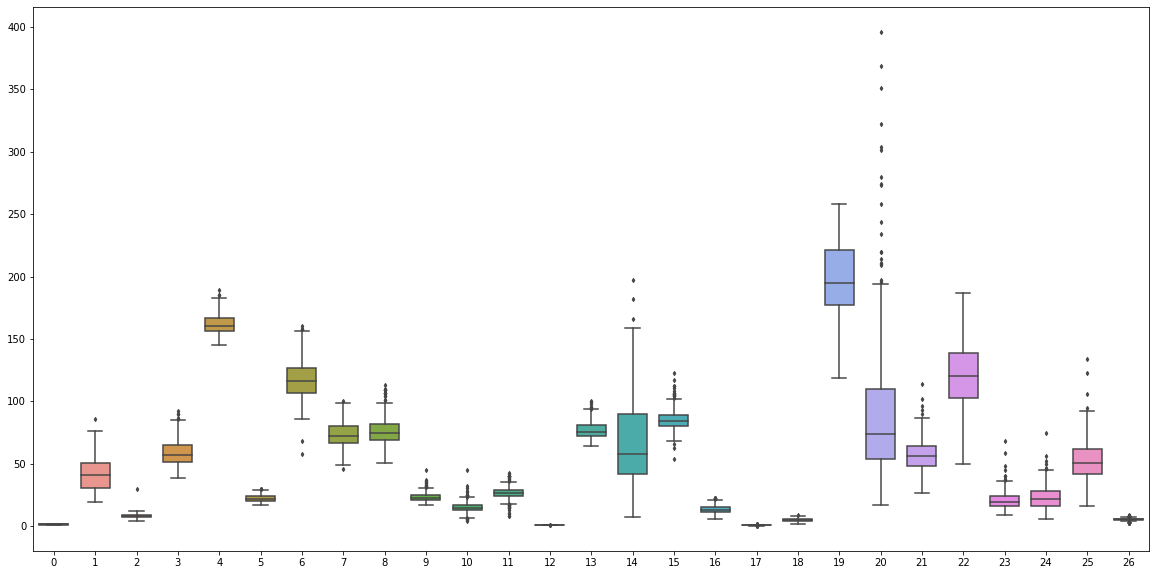

In [65]:
matplotlib.rcParams['figure.figsize'] = 20, 10
sns.boxplot(data=df, fliersize=3, width=0.7)

In [ ]:
#df.to_csv('data.csv', encoding = 'utf-8')